C:\Users\Priyadharshni\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Priyadharshni\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Priyadharshni\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


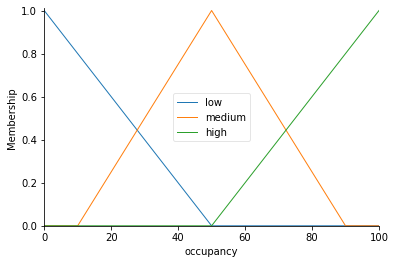

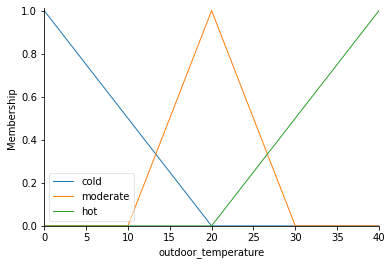

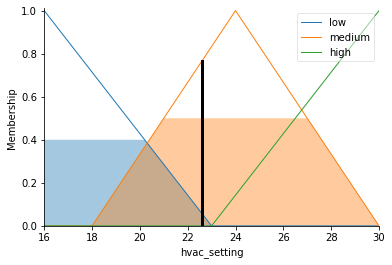

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
occupancy = ctrl.Antecedent(np.arange(0, 101, 1), 'occupancy')
outdoor_temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'outdoor_temperature')
hvac_setting = ctrl.Consequent(np.arange(16, 31, 1), 'hvac_setting')

# Define membership functions
occupancy['low'] = fuzz.trimf(occupancy.universe, [0, 0, 50])
occupancy['medium'] = fuzz.trimf(occupancy.universe, [10, 50, 90])
occupancy['high'] = fuzz.trimf(occupancy.universe, [50, 100, 100])

outdoor_temperature['cold'] = fuzz.trimf(outdoor_temperature.universe, [0, 0, 20])
outdoor_temperature['moderate'] = fuzz.trimf(outdoor_temperature.universe, [10, 20, 30])
outdoor_temperature['hot'] = fuzz.trimf(outdoor_temperature.universe, [20, 40, 40])

hvac_setting['low'] = fuzz.trimf(hvac_setting.universe, [16, 16, 23])
hvac_setting['medium'] = fuzz.trimf(hvac_setting.universe, [18, 24, 30])
hvac_setting['high'] = fuzz.trimf(hvac_setting.universe, [23, 30, 30])

# Define fuzzy rules
rule1 = ctrl.Rule(occupancy['low'] | outdoor_temperature['cold'], hvac_setting['high'])
rule2 = ctrl.Rule(occupancy['medium'] & outdoor_temperature['moderate'], hvac_setting['medium'])
rule3 = ctrl.Rule(occupancy['high'] | outdoor_temperature['hot'], hvac_setting['low'])

# Create control system
hvac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Compute HVAC setting
hvac = ctrl.ControlSystemSimulation(hvac_ctrl)

# Set inputs
hvac.input['occupancy'] = 70
hvac.input['outdoor_temperature'] = 25

# Compute the result
hvac.compute()

# Visualize the result
occupancy.view()
outdoor_temperature.view()
hvac_setting.view(sim=hvac)
plt.show()
